<a href="https://colab.research.google.com/github/AI-Expert-Academy/Deteccao-e-Reconhecimento-Facial-com-Python/blob/main/Reconhecimento_Facial_IA_Expert_Academy_M%C3%A9todos_tradicionais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconhecimento facil com métodos tradicionais

Três técnicas diferentes:

* Eigenfaces
* Fisherfaces
* LBPH - Local Binary Pattern Histogram

## Instalação das bibliotecas

In [ ]:
!pip install opencv-contrib-python==4.10.0.84

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 MB 9.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.11.0.86
    Uninstalling opencv-contrib-python-4.11.0.86:
      Successfully uninstalled opencv-contrib-python-4.11.0.86


## Importação de bibliotecas

In [ ]:
import cv2
import numpy as np
from PIL import Image # Biblioteca para processamento em imgs
from google.colab.patches import cv2_imshow

In [ ]:
!pip freeze

absl-py==1.4.0
accelerate==1.8.1
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.1
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.9.0
argon2-cffi==25.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.2
arviz==0.21.0
astropy==7.1.0
astropy-iers-data==0.2025.6.30.0.39.40
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.8.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.0.0
blosc2==3.5.0
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.1
build==1.2.2.post1
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.6.15
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.2
chex==0.1.89
clarabel==0.11.1
click==8.2.1
cloudpathlib==0.21.1
cloudpickle==3.1.1
cmake==3.31.6
cmdstanp

## Carregamento de base de dados

* Yalefaces: http://vision.ucsd.edu/content/yale-face-database

In [ ]:
import zipfile
path = '/content/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
import os
print(os.listdir('/content/yalefaces/train'))

['subject10.surprised.gif', 'subject14.sleepy.gif', 'subject15.centerlight.gif', 'subject02.sad.gif', 'subject07.rightlight.gif', 'subject01.glasses.gif', 'subject08.sad.gif', 'subject07.sleepy.gif', 'subject06.normal.gif', 'subject08.glasses.gif', 'subject10.rightlight.gif', 'subject05.normal.gif', 'subject11.rightlight.gif', 'subject06.wink.gif', 'subject08.happy.gif', 'subject03.normal.gif', 'subject06.centerlight.gif', 'subject08.surprised.gif', 'subject11.sad.gif', 'subject03.centerlight.gif', 'subject13.happy.gif', 'subject04.centerlight.gif', 'subject11.wink.gif', 'subject06.glasses.gif', 'subject04.wink.gif', 'subject05.glasses.gif', 'subject15.leftlight.gif', 'subject01.noglasses.gif', 'subject05.wink.gif', 'subject15.glasses.gif', 'subject02.glasses.gif', 'subject14.surprised.gif', 'subject14.wink.gif', 'subject14.centerlight.gif', 'subject12.surprised.gif', 'subject04.normal.gif', 'subject12.wink.gif', 'subject09.noglasses.gif', 'subject05.rightlight.gif', 'subject03.wink.gi

In [ ]:
imagem_teste = '/content/yalefaces/train/subject01.leftlight.gif'
imagem = Image.open(imagem_teste).convert('L') #Converte para escala de cinza
type(imagem)

PIL.Image.Image

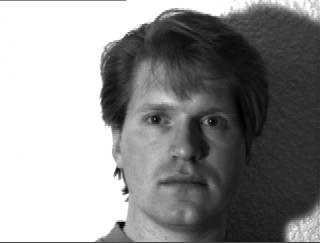

In [ ]:
imagem

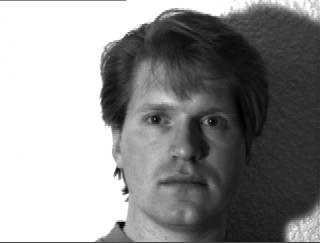

(243, 320)


In [ ]:
imagem_np = np.array(imagem, 'uint8')
cv2_imshow(imagem_np)
print(imagem_np.shape)

## Detecção de faces

In [ ]:
network = cv2.dnn.readNetFromCaffe('/content/deploy.prototxt.txt', '/content/res10_300x300_ssd_iter_140000.caffemodel')

In [ ]:
imagem = cv2.cvtColor(imagem_np, cv2.COLOR_GRAY2BGR)
(h, w) = imagem.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(imagem, (100, 100)), 1.0, (100, 100), (104.0, 177.0, 123.0))
network.setInput(blob)
deteccoes = network.forward()

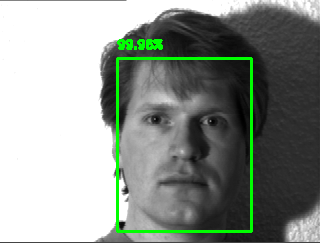

(243, 320, 3)


In [ ]:
conf_min = 0.7
imagem_cp = imagem.copy()
for i in range(0, deteccoes.shape[2]):
  confianca = deteccoes[0, 0, i, 2]
  if confianca > conf_min:
    bbox = deteccoes[0, 0, i, 3:7] * np.array([w, h, w, h])
    (start_x, start_y, end_x, end_y) = bbox.astype('int')
    roi = imagem_cp[start_y:end_y, start_x:end_x]
    text = '{:.2f}%'.format(confianca * 100)
    cv2.putText(imagem, text, (start_x, start_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 255, 0), 2)
    cv2.rectangle(imagem, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)

face = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
cv2_imshow(imagem)
print(imagem.shape)

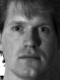

(80, 60)


In [ ]:
face = cv2.resize(face, (60,80))
cv2_imshow(face)
print(face.shape)

In [ ]:
def detecta_faces(network, path_imagem, conf_min = 0.7):
  imagem = Image.open(path_imagem).convert('L')
  imagem = np.array(imagem, 'uint8')
  imagem = cv2.cvtColor(imagem, cv2.COLOR_GRAY2BGR)
  (h, w) = imagem.shape[:2]
  blob = cv2.dnn.blobFromImage(cv2.resize(imagem, (100, 100)), 1.0, (100, 100), (104.0, 177.0, 123.0))
  network.setInput(blob)
  deteccoes = network.forward()

  face = None
  for i in range(0, deteccoes.shape[2]):
    confianca = deteccoes[0, 0, i, 2]
    if confianca > conf_min:
      bbox = deteccoes[0, 0, i, 3:7] * np.array([w, h, w, h])
      (start_x, start_y, end_x, end_y) = bbox.astype('int')
      roi = imagem[start_y:end_y, start_x:end_x]
      roi = cv2.resize(roi, (60,80))
      cv2.rectangle(imagem, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)
      face = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
  return face, imagem


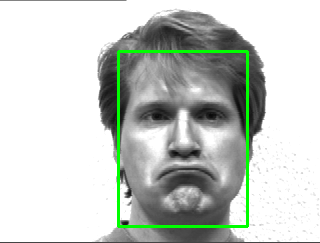

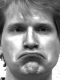

In [ ]:
teste_imagem = '/content/yalefaces/train/subject01.sad.gif'
face, imagem = detecta_faces(network, teste_imagem)
cv2_imshow(imagem)
cv2_imshow(face)

## Construção da base de dados

In [ ]:
def get_imagem_data():
  paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
  #print(paths)
  faces = []
  ids = []
  for path in paths:
    face, imagem = detecta_faces(network, path)
    id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
    ids.append(id)
    faces.append(face)
    cv2_imshow(face)
  return np.array(ids), faces

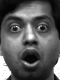

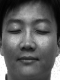

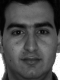

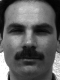

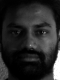

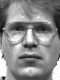

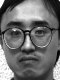

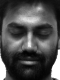

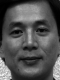

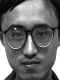

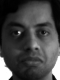

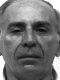

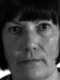

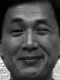

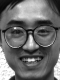

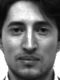

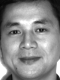

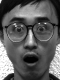

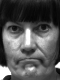

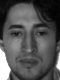

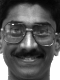

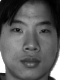

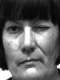

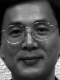

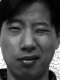

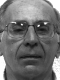

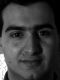

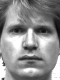

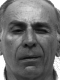

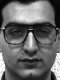

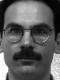

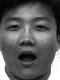

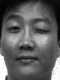

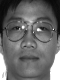

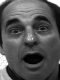

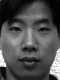

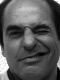

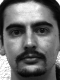

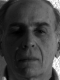

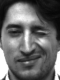

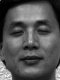

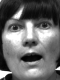

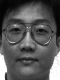

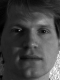

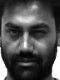

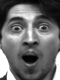

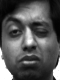

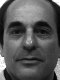

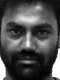

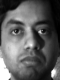

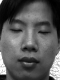

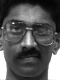

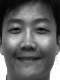

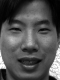

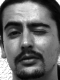

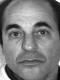

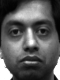

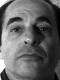

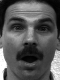

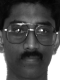

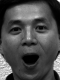

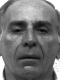

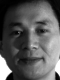

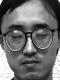

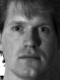

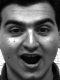

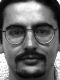

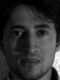

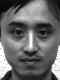

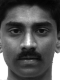

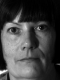

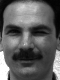

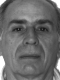

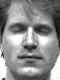

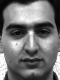

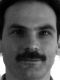

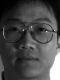

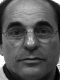

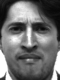

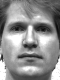

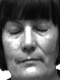

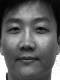

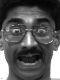

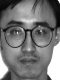

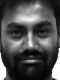

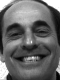

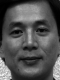

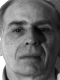

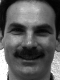

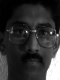

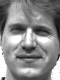

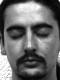

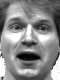

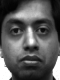

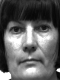

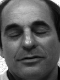

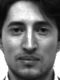

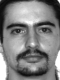

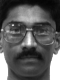

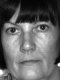

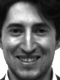

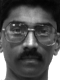

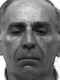

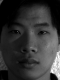

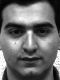

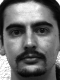

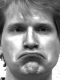

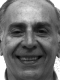

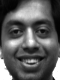

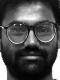

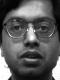

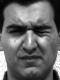

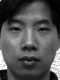

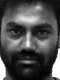

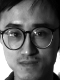

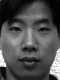

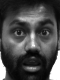

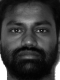

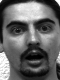

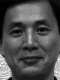

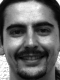

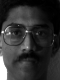

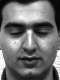

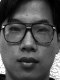

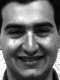

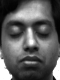

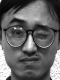

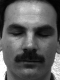

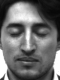

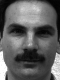

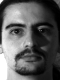

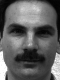

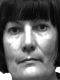

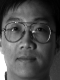

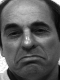

In [ ]:
ids, faces = get_imagem_data()

In [ ]:
ids

array([10, 14, 15,  2,  7,  1,  8,  7,  6,  8, 10,  5, 11,  6,  8,  3,  6,
        8, 11,  3, 13,  4, 11,  6,  4,  5, 15,  1,  5, 15,  2, 14, 14, 14,
       12,  4, 12,  9,  5,  3,  6, 11, 14,  1,  7,  3, 10, 12,  7, 10,  4,
       13, 14,  4,  9, 12, 10, 12,  2, 13,  6,  5,  6,  8,  1, 15,  9,  3,
        8, 13, 11,  2,  5,  1, 15,  2, 14, 12,  3,  1, 11, 14, 13,  8,  7,
       12,  6,  5,  2, 13,  1,  9,  1, 10, 11, 12,  3,  9, 13, 11,  3, 13,
        5,  4, 15,  9,  1,  5, 10,  7, 10, 15,  4,  7,  8,  4,  7,  7,  9,
        6,  9, 13, 15,  4, 15, 10,  8,  2,  3,  2,  9,  2, 11, 14, 12])

array([[ 30,  34,  26, ...,  23,  33,  38],
       [ 29,  28,  19, ...,  22,  22,  26],
       [ 26,  23,  18, ...,  24,  23,  24],
       ...,
       [249, 254, 255, ..., 121, 215, 248],
       [255, 253, 254, ...,  60, 162, 248],
       [255, 255, 255, ...,  40,  70, 177]], dtype=uint8)
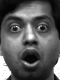

In [ ]:
faces[0]

In [ ]:
ids[0]

np.int64(10)

In [ ]:
faces[0].shape

(80, 60)

In [ ]:
len(ids), len(faces)

(135, 135)

## Eigenfaces

### Avaliação do algoritmo

In [ ]:
eigen_classifier = cv2.face.EigenFaceRecognizer_create
eigen_classifier.train(faces, ids)
eigen_classifier.write('eigen_classifier.yml')

AttributeError: 'builtin_function_or_method' object has no attribute 'train'

In [ ]:
eigen_classifier = cv2.face.EigenFaceRecognizer_create()
eigen_classifier.read('eigen_classifier.yml')

In [ ]:
imagem_teste = '/content/yalefaces/test/subject05.sleepy.gif'

In [ ]:
face, imagem = detecta_faces(network, imagem_teste)

In [ ]:
face, face.shape

(array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 109, 150, 215],
        [255, 255, 255, ..., 113, 168, 249],
        [255, 255, 255, ..., 124, 191, 255]], dtype=uint8),
 (80, 60))

In [ ]:
previsao = eigen_classifier.predict(face)
previsao

(5, 666.9053541655974)

In [ ]:
saida_esperada = int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject', ''))
saida_esperada

5

array([[[119, 119, 119],
        [129, 129, 129],
        [130, 130, 130],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[252, 252, 252],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 91,  91,  91],
        [ 89,  89,  89],
        [ 93,  93,  93]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [102, 102, 102],
        [ 97,  97,  97],
        [102, 102, 102]],

       [[ 68,  68,  68],
        [ 68,  68,  68],
        [ 68,  68,  68],
        ...,
        [ 68,  68,  68],
        [ 68,  68,  68],
        [ 68,  68,  68]]], dtype=uint8)
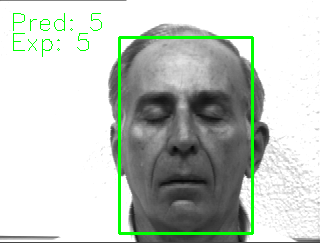

In [ ]:
cv2.putText(imagem, 'Pred: ' + str(previsao[0]), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0))
cv2.putText(imagem, 'Exp: ' + str(previsao[0]), (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0))

In [ ]:
def teste_reconhecimento(imagem_teste, classificador, show_conf = False):
  face, imagem_np = detecta_faces(network, imagem_teste)
  previsao, conf = classificador.predict(face)
  saida_esperada = int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject', ''))
  cv2.putText(imagem_np, 'Pred: ' + str(previsao), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.8, (0, 255, 0))
  cv2.putText(imagem_np, 'Exp: ' + str(saida_esperada), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.8, (0, 255, 0))
  if show_conf:
    print(conf)

  return imagem_np, previsao

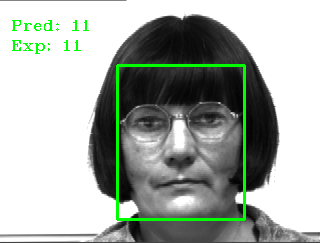

In [ ]:
imagem_teste = '/content/yalefaces/test/subject11.glasses.gif'
imagem_np, previsao = teste_reconhecimento(imagem_teste, eigen_classifier)
cv2_imshow(imagem_np)

In [ ]:
def avalia_algoritmo(paths, classficador):
  previsoes = []
  saidas_esperadas = []
  for path in paths:
    face, imagem = detecta_faces(network, path)
    previsao = classficador.predict(face)
    saida_esperada = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
    previsoes.append(previsao[0])
    saidas_esperadas.append(saida_esperada)
  return np.array(previsoes), np.array(saidas_esperadas)

In [ ]:
paths_teste = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
print(paths_teste)

['/content/yalefaces/test/subject15.rightlight.gif', '/content/yalefaces/test/subject03.leftlight.gif', '/content/yalefaces/test/subject10.sad.gif', '/content/yalefaces/test/subject06.leftlight.gif', '/content/yalefaces/test/subject12.normal.gif', '/content/yalefaces/test/subject10.centerlight.gif', '/content/yalefaces/test/subject02.centerlight.gif', '/content/yalefaces/test/subject08.normal.gif', '/content/yalefaces/test/subject13.sleepy.gif', '/content/yalefaces/test/subject04.surprised.gif', '/content/yalefaces/test/subject01.gif', '/content/yalefaces/test/subject08.rightlight.gif', '/content/yalefaces/test/subject05.sleepy.gif', '/content/yalefaces/test/subject14.sad.gif', '/content/yalefaces/test/subject09.sad.gif', '/content/yalefaces/test/subject02.leftlight.gif', '/content/yalefaces/test/subject06.happy.gif', '/content/yalefaces/test/subject04.leftlight.gif', '/content/yalefaces/test/subject05.surprised.gif', '/content/yalefaces/test/subject14.normal.gif', '/content/yalefaces/

In [ ]:
previsoes, saidas_esperadas = avalia_algoritmo(paths_teste, eigen_classifier)

In [ ]:
previsoes

array([ 1, 15, 10,  8, 12, 10,  9,  8, 13,  4,  1, 10,  5, 14,  9,  9,  6,
       14,  5, 14,  7, 11, 12, 11, 15, 13, 13,  1,  3,  6])

In [ ]:
saidas_esperadas

array([15,  3, 10,  6, 12, 10,  2,  8, 13,  4,  1,  8,  5, 14,  9,  2,  6,
        4,  5, 14,  7, 11, 12, 11, 15, 13,  7,  1,  3,  9])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(saidas_esperadas, previsoes)

0.7

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(saidas_esperadas, previsoes)
cm

array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

<Axes: >

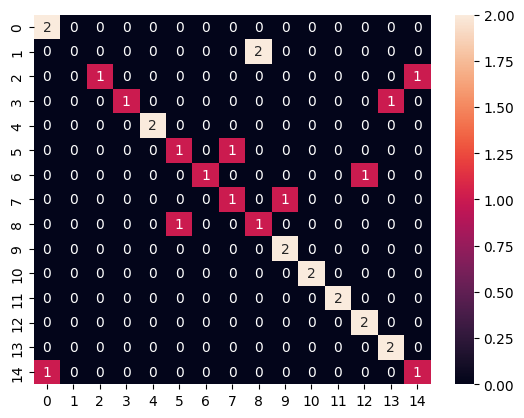

In [ ]:
import seaborn
seaborn.heatmap(cm, annot=True)

### Parâmetros Eigenfaces

* **num_components**: número de eigenfaces - Principal Component Analysis. Não existe uma regra geral para o número de componentes, sendo baseado nos dados de entrada. A documentação indica que 80 componentes em geral são suficientes
* **threshold**: confiança. Quanto maior o valor, menos o algoritmo vai requerer similaridade entre as faces

Quando o valor for maior do que o threshold, -1 será retornada (unknown). A confiança é uma distância entre a face de teste e a face mais próxima encontrada.

Valor default: 1.7976931348623185e+308



> **num_components**



In [ ]:
def resultados_avaliacao(paths_teste, classificador):
  previsoes, saidas_esperadas = avalia_algoritmo(paths_teste, classificador)
  accuracy = accuracy_score(saidas_esperadas, previsoes)
  print('Acurácia: ', accuracy)
  cm = confusion_matrix(saidas_esperadas, previsoes)
  seaborn.heatmap(cm, annot=True)

## Fisherfaces

In [ ]:
fisher_classifier = cv2.face.FisherFaceRecognizer_create()
fisher_classifier.train(faces, ids)
fisher_classifier.write('fisher_classifier.yml')

In [ ]:
fisher_classifier = cv2.face.FisherFaceRecognizer_create()
fisher_classifier.read('/content/fisher_classifier.yml')

567.809143326177


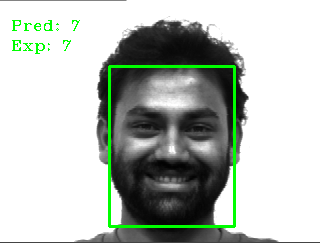

In [ ]:
imagem_teste = '/content/yalefaces/test/subject07.happy.gif'
imagem_np, previsao = teste_reconhecimento(imagem_teste, fisher_classifier, True)
cv2_imshow(imagem_np)

### Avaliação do algoritmo

Acurácia:  0.9


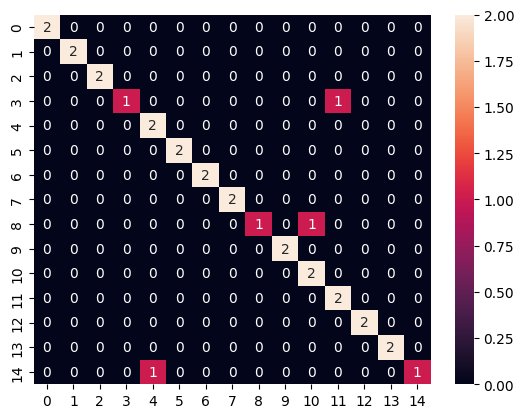

In [ ]:
resultados_avaliacao(paths_teste, fisher_classifier)

### Parâmetros Fisherfaces

#### nun_components

In [ ]:
fisher_classifier_2 = cv2.face.FisherFaceRecognizer_create(5)
fisher_classifier_2.train(faces, ids)
imagem_teste = '/content/yalefaces/test/subject07.happy.gif'
imagem_np, previsao = teste_reconhecimento(imagem_teste, fisher_classifier_2, True)
cv2_imshow(imagem_np)

#### threshold

In [ ]:
fisher_classifier_2 = cv2.face.FisherFaceRecognizer_create(20, 1000)
fisher_classifier_2.train(faces, ids)
imagem_teste = '/content/yalefaces/test/subject07.happy.gif'
imagem_np, previsao = teste_reconhecimento(imagem_teste, fisher_classifier_2, True)
cv2_imshow(imagem_np)

In [ ]:
resultados_avaliacao(paths_teste, fisher_classifier_2)

## LBPH

In [ ]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

In [ ]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.read('/content/lbph_classifier.yml')

101.0752843387172


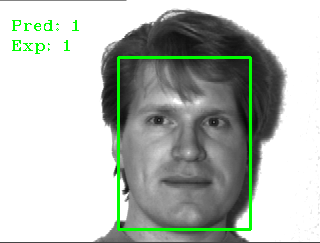

In [ ]:
imagem_teste = '/content/yalefaces/test/subject01.gif'
imagem_np, previsao = teste_reconhecimento(imagem_teste, lbph_classifier, True)
cv2_imshow(imagem_np)

### Avaliação do algoritmo

Acurácia:  0.8333333333333334


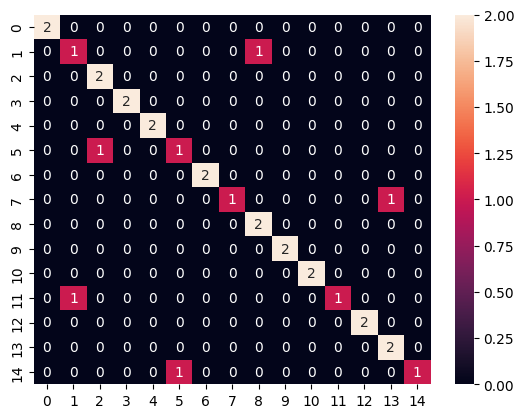

In [ ]:
resultados_avaliacao(paths_teste, lbph_classifier)

### Parâmetros LBPH

* **radius** => É a distância do pixel central para os vizinhos. Se o raio aumenta, a região do cálculo fica maior mas deve perder alguns detalhes da imagem já que a região ficará mais dispersa
* **neighbors** => Número de pontos para construir um padrão local. Enquanto o raio indica a abrangência, neighbors é usado para especificar quantos vizinhos serão considerados nos cálculos. Quanto maior o número de vizinhos, maior é o esforço computacional
* **grid_x e grid_y** => Número de "patches" nas direções X e Y, que indicam as divisões na imagem. Por exemplo, em uma imagem 80x80 com a grade 8x8, serão utilizadas 100 pixels por "pedaço" (10x10)
* **threshold** => indica a confiança

In [ ]:
## valores padrões

# radius: 1
# neighbors: 8
# grid_x: 8
# grid_y: 8
# threshold: 1.7976



> **radius**



134.6560563076134


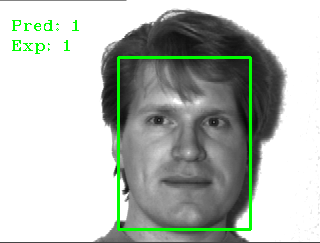

In [ ]:
lbph_classifier_2 = cv2.face.LBPHFaceRecognizer_create(radius = 4)
lbph_classifier_2.train(faces, ids)
imagem_np, previsao = teste_reconhecimento(imagem_teste, lbph_classifier_2, True)
cv2_imshow(imagem_np)

Acurácia:  0.8


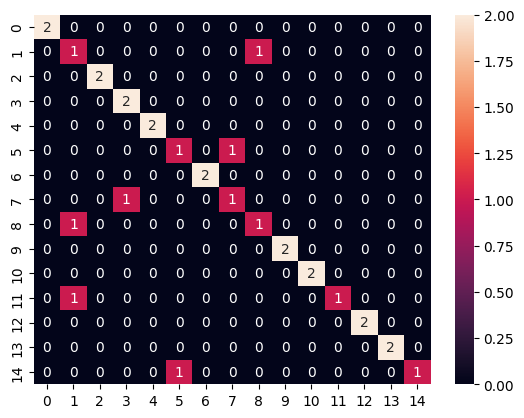

In [ ]:
resultados_avaliacao(paths_teste, lbph_classifier_2)
#



> **neighbors**



170.65572961522378


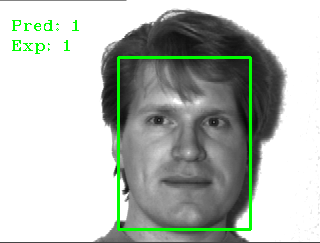

In [ ]:
lbph_classifier_2 = cv2.face.LBPHFaceRecognizer_create(radius = 4, neighbors = 12)
lbph_classifier_2.train(faces, ids)
imagem_np, previsao = teste_reconhecimento(imagem_teste, lbph_classifier_2, True)
cv2_imshow(imagem_np)

Acurácia:  0.8


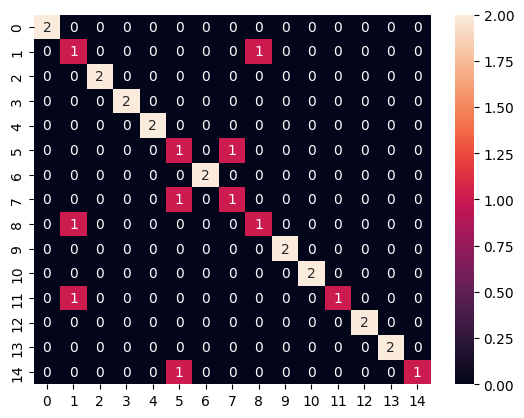

In [ ]:
resultados_avaliacao(paths_teste, lbph_classifier_2)



> **grid_x e grid_y**



613.1367627861347


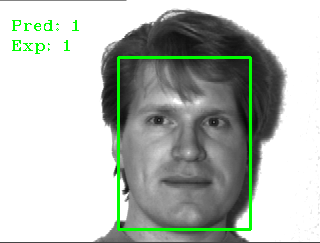

In [ ]:
lbph_classifier_2 = cv2.face.LBPHFaceRecognizer_create(radius = 4, neighbors = 12, grid_x=14, grid_y=14)
lbph_classifier_2.train(faces, ids)
imagem_np, previsao = teste_reconhecimento(imagem_teste, lbph_classifier_2, True)
cv2_imshow(imagem_np)

Acurácia:  0.7666666666666667


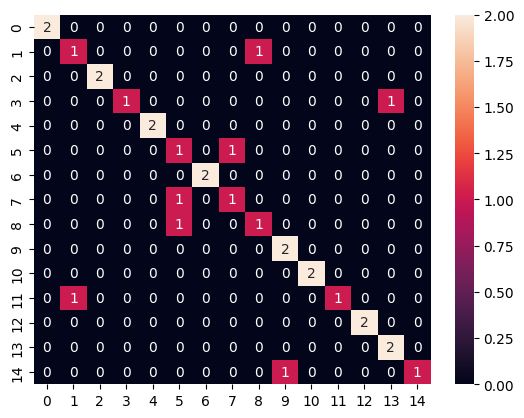

In [ ]:
resultados_avaliacao(paths_teste, lbph_classifier_2)



> **threshold**



1.7976931348623157e+308


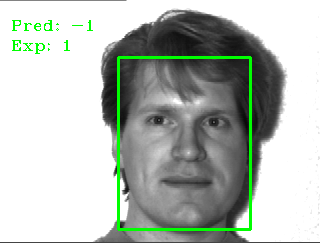

In [ ]:
lbph_classifier_2 = cv2.face.LBPHFaceRecognizer_create(radius = 4, neighbors = 12, grid_x=14, grid_y=14, threshold = 550)
lbph_classifier_2.train(faces, ids)
imagem_np, previsao = teste_reconhecimento(imagem_teste, lbph_classifier_2, True)
cv2_imshow(imagem_np)

Acurácia:  0.6333333333333333


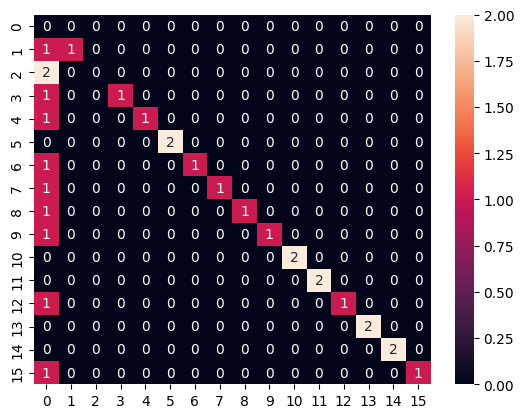

In [ ]:
resultados_avaliacao(paths_teste, lbph_classifier_2)

# Reconhecimento facial com métodos de deep learning

## Importação das bibliotecas

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image
import zipfile
import os
import dlib

## Detecção de pontos faciais

* 68 anotações criadas por meio de base de dados iBUG 300-W. Mais detalhes: https://ibug.doc.ic.ac.uk/resources/facial-point-annotations/

In [ ]:
detector_face = dlib.get_frontal_face_detector()
detector_pontos = dlib.shape_predictor('/content/shape_predictor_68_face_landmarks.dat')

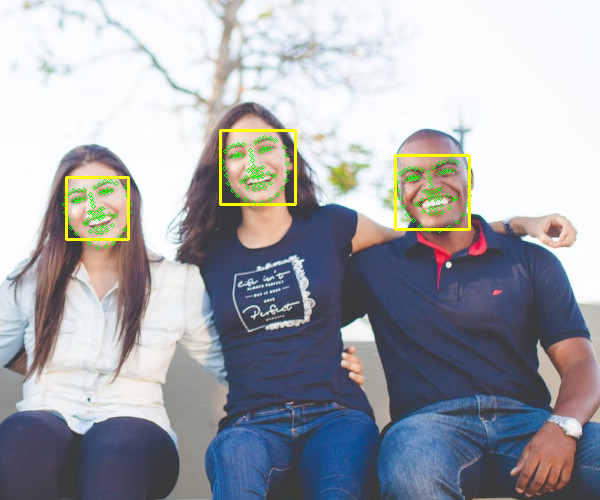

In [ ]:
imagem = cv2.imread('/content/people2.jpg')
deteccoes_faces = detector_face(imagem, 1)

for face in deteccoes_faces:
  pontos = detector_pontos(imagem, face)
  for ponto in pontos.parts():
    cv2.circle(imagem, (ponto.x, ponto.y), 2, (0, 255, 0), 1)

  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(imagem, (l, t), (r, b), (0, 255, 255), 2)

cv2_imshow(imagem)

## Carregamento da base de dados

In [ ]:
path = 'yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

## Detecção de descritores faciais

* Arquitetura ResNet: https://arxiv.org/abs/1512.03385

In [ ]:
extrator_descritor_facial = dlib.face_recognition_model_v1('/content/dlib_face_recognition_resnet_model_v1.dat')

RuntimeError: Error while calling cudaGetDevice(&the_device_id) in file /tmp/.tmpVODJFu/sdists-v9/pypi/dlib/19.24.6/JP1LEmYABDBWWW4MLPNq-/src/dlib/cuda/gpu_data.cpp:204. code: 35, reason: CUDA driver version is insufficient for CUDA runtime version

In [ ]:
imagem_teste = '/content/yalefaces/train/subject01.normal.gif'
imagem = Image.open(imagem_teste).convert('L')
imagem_np = np.array(imagem, 'uint8')
imagem_np = cv2.cvtColor(imagem_np, cv2.COLOR_GRAY2RGB)

deteccoes_faces = detector_face(imagem_np, 1)

for face in deteccoes_faces:
  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(imagem_np, (l, t), (r, b), (0, 0, 255), 2)

  pontos = detector_pontos(imagem_np, face)
  for ponto in pontos.parts():
    cv2.circle(imagem_np, (ponto.x, ponto.y), 2, (0,255,0), 1)

  descritor_face = extrator_descritor_facial.compute_face_descriptor(imagem_np, pontos)

  descritor_face = [f for f in descritor_face]
  descritor_face = np.asarray(descritor_face, dtype=np.float64)
  descritor_face = descritor_face[np.newaxis, :]

cv2_imshow(imagem_np)

RuntimeError: Error while calling cudaOccupancyMaxPotentialBlockSize(&num_blocks,&num_threads,K) in file /tmp/.tmpVODJFu/sdists-v9/pypi/dlib/19.24.6/JP1LEmYABDBWWW4MLPNq-/src/dlib/cuda/cuda_utils.h:186. code: 222, reason: the provided PTX was compiled with an unsupported toolchain.

In [ ]:
def extrai_descritor(face, imagem_np, descritor_face):
  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(imagem_np, (l, t), (r, b), (0, 0, 255), 2)

  pontos = detector_pontos(imagem_np, face)
  for ponto in pontos.parts():
    cv2.circle(imagem_np, (ponto.x, ponto.y), 2, (0,255,0), 1)

  descritor_face = extrator_descritor_facial.compute_face_descriptor(imagem_np, pontos)
  descritor_face = [f for f in descritor_face]
  descritor_face = np.asarray(descritor_face, dtype=np.float64)
  descritor_face = descritor_face[np.newaxis, :]

  if descritores_faces is None:
    descritores_faces = descritor_face
  else:
    descritores_faces = np.concatenate((descritores_faces, descritor_face), axis=0)

  return imagem_np, descritores_faces

## Base de dados de treinamento

In [ ]:
def carrega_treinamento(path_dataset):
  index = {}
  idx = 0
  descritores_faces = None

  paths = [os.path.join(path_dataset, f) for f in os.listdir(path_dataset)]

  for path in paths:
    imagem = Image.open(path).convert('L')
    imagem_np = np.array(imagem, 'uint8')
    imagem_np = cv2.cvtColor(imagem_np, cv2.COLOR_GRAY2RGB)

    deteccoes_faces = detector_face(imagem_np, 1)
    for face in deteccoes_faces:
      imagem_np, descritores_faces = extrai_descritor(face, imagem_np, descritores_faces)
      index[idx] = path
      idx += 1

    cv2_imshow(imagem_np)
  return descritores_faces, index

In [ ]:
len(descritores_faces), len(index)

In [ ]:
index

In [ ]:
descritores_faces

In [ ]:
descritores_faces[0]

In [ ]:
descritores_faces[0].shape

## Salvar descritores

### Carregar descritores

In [ ]:
import pickle
np.save('descritores_faces.npy', descritores_faces)

with open('index_faces.picklepkl', 'wb') as f:
  pickle.dump(index, f)

In [ ]:
index = np.load('/content/index_faces.pickle', allow_pickle='TRUE')
descritores_faces = np.load('/content/descritores_faces.npy')

## Cálculo da distância entre as faces

In [ ]:
descritores_faces[131]

In [ ]:
index[131]

In [ ]:
np.linalg.norm(descritores_faces[131] - descritores_faces[131])

In [ ]:
index[0]

In [ ]:
np.linalg.norm(descritores_faces[131] - descritores_faces[0])

In [ ]:
np.linalg.norm(descritores_faces[0] - descritores_faces, axis = 1)

In [ ]:
np.linalg.norm(descritores_faces[0] - descritores_faces[1:], axis = 1)

In [ ]:
np.argmin(np.linalg.norm(descritores_faces[0] - descritores_faces[1:], axis = 1))

In [ ]:
np.argmin(np.linalg.norm(descritores_faces[0] - descritores_faces[1:], axis = 1))[86]

In [ ]:
index[0]

In [ ]:
index[87]

## Reconhecimento das faces

In [ ]:
def previsoes_dlib(path_dataset, descritores_faces, index, threshold = 0.5):
  previsoes = []
  saidas_esperadas = []
  paths = [os.path.join(path_dataset, f) for f in os.listdir(path_dataset)]
  for path in paths:
    imagem = Image.open(path).convert('RGB')
    imagem_np = np.array(imagem, 'uint8')
    (h, w) = imagem_np.shape[:2]
    deteccoes_faces = detector_face(imagem_np, 1)
    for face in deteccoes_faces:
      pontos = detector_pontos(imagem_np, face)
      descritor_face = extrator_descritor_facial.compute_face_descriptor(imagem_np, pontos)
      descritor_face = [f for f in descritor_face]
      descritor_face = np.asarray(descritor_face, dtype=np.float64)
      descritor_face = descritor_face[np.newaxis, :]

      distancias = np.linalg.norm(descritor_face - descritores_faces, axis = 1)
      min_index = np.argmin(distancias)
      distancia_minima = distancias[min_index]
      if distancia_minima <= threshold:
        nome_previsao = int(os.path.split(index[min_index])[1].split('.')[0].replace('subject', ''))
      else:
        nome_previsao = -1

      nome_real = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))

      previsoes.append(nome_previsao)
      saidas_esperadas.append(nome_real)

      cv2.putText(imagem_np, 'Pred: ' + str(nome_previsao), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
      cv2.putText(imagem_np, 'Exp: ' + str(nome_real), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
      cv2.putText(imagem_np, str(distancia_minima), (10, h-30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.6, (0,0,255))

    cv2_imshow(imagem_np)

  previsoes = np.array(previsoes)
  saidas_esperadas = np.array(saidas_esperadas)

  return previsoes, saidas_esperadas

In [ ]:
previsoes, saidas_esperadas = previsoes_dlib('/content/yalefaces/test', descritores_faces, index)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(saidas_esperadas, previsoes)

## Imagens mais desafiadoras

In [ ]:
path = 'celeb_dataset.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
import imutils

In [ ]:
def carrega_treinamento(path_dataset, max_width = 400):
  index = {}
  idx = 0
  descritores_faces = None

  subdirs = [os.path.join(path_dataset, f) for f in os.listdir(path_dataset)]

  for subdir in subdirs:
    nome = subdir.split(os.path.sep)[-1]
    print(nome)
    lista_imagens = [os.path.join(subdir, f) for f in os.listdir(subdir)]
    for imagem_path in lista_imagens:
      imagem = Image.open(imagem_path).convert('RGB')
      imagem_np = np.array(imagem, 'uint8')

      if(imagem_np.shape[1] > max_width):
        imagem_np = imutils.resize(imagem_np, width=max_width)

      deteccoes_faces = detector_face(imagem_np, 1)
      for face in deteccoes_faces:
        imagem_np, descritores_faces = extrai_descritor(face, imagem_np, descritores_faces)
        index[idx] = nome
        idx += 1
      cv2_imshow(imagem_np)
  return descritores_faces, index

In [ ]:
descritores_faces, index = carrega_treinamento('/content/celeb_dataset/train')

### Salvar os descritores

In [ ]:
np.save('descritores_faces.npy', descritores_faces)

with open('dataset_images_index.pickle', 'wb') as f:
  pickle.dump(index, f)

In [ ]:
len(descritores_faces), len(index)

In [ ]:
index

### Reconhecimento das faces

In [ ]:
def previsoes_dlib(path_dataset, descritores_faces, index, show_imgs = True, threshold = 0.5, max_width = 700):
  previsoes = []
  saidas_esperadas = []
  subdirs = [os.path.join(path_dataset, f) for f in os.listdir(path_dataset)]

  for subdir in subdirs:
    nome = subdir.split(os.path.sep)[-1]
    lista_imagens = [os.path.join(subdir, f) for f in os.listdir(subdir)]
    for imagem_path in lista_imagens:
      imagem = Image.open(imagem_path).convert('RGB')
      imagem_np = np.array(imagem, 'uint8')

      if (imagem_np.shape[1] > max_width):
        imagem_np = imutils.resize(imagem_np, width=max_width)

      (h, w) = imagem_np.shape[:2]

      deteccoes_faces = detector_face(imagem_np, 1)
      for face in deteccoes_faces:
        pontos = detector_pontos(imagem_np, face)
        descritor_face = extrator_descritor_facial.compute_face_descriptor(imagem_np, pontos)
        descritor_face = [f for f in descritor_face]
        descritor_face = np.asarray(descritor_face, dtype=np.float64)
        descritor_face = descritor_face[np.newaxis, :]

        distancias = np.linalg.norm(descritor_face - descritores_faces, axis = 1)
        min_index = np.argmin(distancias)
        distancia_minima = distancias[min_index]
        if distancia_minima <= threshold:
          nome_previsao = index[min_index].split(os.path.sep)[-2]
        else:
          nome_previsao = 'Não identificado'

        nome_real = nome

        previsoes.append(nome_previsao)
        saidas_esperadas.append(nome_real)

        cv2.putText(imagem_np, 'Pred: ' + str(nome_previsao), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
        cv2.putText(imagem_np, 'Exp: ' + str(nome_real), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
        cv2.putText(imagem_np, str(distancia_minima), (10, h-30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.6, (0,0,255))
        continue

      if show_imgs:
        cv2_imshow(imagem_np)

  previsoes = np.array(previsoes)
  saidas_esperadas = np.array(saidas_esperadas)

  return previsoes, saidas_esperadas

In [ ]:
previsoes, saidas_esperadas = previsoes_dlib('/content/celeb_dataset/test', descritores_faces, index, True, 0.5)

In [ ]:
accuracy_score(saidas_esperadas, previsoes)

### Melhoria dos resultados

In [ ]:
previsoes, saidas_esperadas = previsoes_dlib('/content/celeb_dataset/test', descritores_faces, index, True, 0.6)

In [ ]:
accuracy_score(saidas_esperadas, previsoes)

# Reconhecimento facial com a biblioteca face_recognition

* Criado por Adam Geitgey

## Instalação e importação da biblioteca

In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566166 sha256=68f8bfc01ac5c22a6002bb342704062cc41653cd8597cd25227d9863bc86801d
  Stored in directory: /root/.cache/pip/wheels/04/52/ec/9355da79c29f160b038a20c784db2803c2f9fa2c8a462c176a
Successfully built face-recognition-models


In [ ]:
import face_recognition

## Encoding faces

In [ ]:
foto_jones = face_recognition.load_image_file('/content/jones.jpg')
foto_jones_encoding = face_recognition.face_encodings(foto_jones)[0]

In [ ]:
len(foto_jones_encoding)

In [ ]:
foto_jones_encoding

In [ ]:
foto_desconhecida = face_recognition.load_image_file('/content/desconhecido.jpg')
foto_desconhecida_encoding = face_recognition.face_encodings(foto_desconhecida)[0]

In [ ]:
foto_desconhecida_encoding

## Comparação das faces

* Documentação: https://face-recognition.readthedocs.io/en/latest/_modules/face_recognition/api.html

In [ ]:
resultados = face_recognition.compare_faces([foto_jones_encoding], foto_desconhecida_encoding)
print(resultados)

In [ ]:
foto_desconhecida = face_recognition.load_image_file('/content/gabriel.jpg')
foto_desconhecida_encoding = face_recognition.face_encodings(foto_desconhecida)[0]
resultados = face_recognition.compare_faces([foto_jones_encoding], foto_desconhecida_encoding)

if resultados[0] == True:
  print('É a foto do Jones')
else:
  print('Não é a foto do Jones')

In [ ]:
foto_gabriel = face_recognition.load_image_file('/content/gabriel.jpg')
foto_gabriel_encoding = face_recognition.face_encodings(foto_gabriel)[0]

In [ ]:
lista_enconding = [foto_jones_encoding, foto_gabriel_encoding]

In [ ]:
lista_nomes = ['João Paulo', 'Gabriel']

In [ ]:
imagem_teste = cv2.imread('/content/jones.test01.jpg')
imagem_rgb = cv2.cvtColor(imagem_teste, cv2.COLOR_BGR2RGB)
localizacao_faces = face_recognition.face_locations(imagem_rgb, model='hog')
print(localizacao_faces)
enconding_face = face_recognition.face_encodings(imagem_rgb, localizacao_faces)
enconding_face = enconding_face[0]
print(enconding_face)

In [ ]:
resultados = face_recognition.compare_faces(lista_enconding, enconding_face)
print(resultados)

In [ ]:
distancias_faces = face_recognition.face_distance(lista_enconding, enconding_face)
print(distancias_faces)

In [ ]:
best_match_index = np.argmin(distancias_faces)
print(best_match_index)

In [ ]:
if resultados[best_match_index]:
  pred = lista_nomes[best_match_index]
  print(pred + ' foi localizado na imagem')
  cv2_imshow(imagem_teste)
  print(distancias_faces[best_match_index])

## Codificação de todas as faces de um diretório

In [ ]:
paths = [os.path.join('/content', f) for f in os.listdir('/content') if f.endswith('.jpg')]
print(paths)

In [ ]:
def get_encodings(paths):
  print('{} imagens encontradas'.format(len(paths)))
  lista_encodings = []
  lista_nomes = []
  for img_path in paths:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    basename = os.path.basename(img_path)
    (nome, ext) = os.path.splitext(basename)
    # print(nome, ext)
    face_roi = face_recognition.face_locations(img, model='cnn')
    face_encoding = face_recognition.face_encodings(img, face_roi)[0]
    if len(face_encoding) > 0:
      lista_encodings.append(face_encoding)
      lista_nomes.append(nome)
    else:
      print('Nenhuma face encontrada na imagem {}'.format(img_path))
  return lista_encodings, lista_nomes

In [ ]:
lista_encodings, lista_nomes = get_encodings(paths)

In [ ]:
len(lista_encodings), len(lista_nomes)

In [ ]:
lista_nomes

In [ ]:
def reconhece_faces(imagem, lista_encodings, lista_nomes, tolerancia = 0.6):
  img_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
  localizacao_faces = face_recognition.face_locations(img_rgb)
  face_encondings = face_recognition.face_encondings(img_rgb, localizacao_faces)
  face_nomes = []
  conf = []
  for enconding in face_encondings:
    matches = face_recognition.compare_faces(lista_encodings, enconding, tolerance = tolerancia)
    nome = 'Não identificado'
    distancias = face_recognition.face_distance(lista_encodings, enconding)
    best_match_index = np.argmin(distancias)
    if matches[best_match_index]:
      nome = lista_nomes[best_match_index]
    face_nomes.append(nome)
    conf.append(distancias[best_match_index])
  localizacao_faces = np.array(localizacao_faces)
  return localizacao_faces.astype(int), face_nomes, conf

## Visualização dos resultados

* As coordenadas são retornadas na seguinte ordem: top, right, bottom e left

In [ ]:
imagem_teste = cv2.imread('/content/andrew_emma.jpg')

In [ ]:
localizacoes, nomes, confianca = reconhece_faces(imagem_teste, lista_encodings, lista_nomes)

In [ ]:
localizacoes

In [ ]:
nomes

In [ ]:
confianca

In [ ]:
for face_loc, nome, conf in zip(localizacoes, nomes, confianca):
  top, right, bottom, left = face_loc[0], face_loc[1], face_loc[2], face_loc[3]
  cv2.putText(imagem_teste, nome, (left, top-10), cv2.FONT_HERSHEY_DUPLEX, 0.8, (0,0,255), 2)
  cv2.rectangle(imagem_teste, (left, top), (right, bottom), (0,10,255), 4)
  print(conf)
cv2_imshow(imagem_teste)

In [ ]:
def mostra_reconhecimento(imagem_teste, lista_encodings, lista_nomes, max_width = 700, tolerancia = 0.6):
  localizacao, nomes, confiancas = reconhece_faces(imagem_teste, lista_encodings, lista_nomes, tolerancia)
  for face_loc, nome, conf in zip(localizacoes, nomes, confianca):
    top, right, bottom, left = face_loc[0], face_loc[1], face_loc[2], face_loc[3]
    cv2.putText(imagem_teste, nome, (left, top-10), cv2.FONT_HERSHEY_DUPLEX, 0.8, (0,0,255), 2)
    cv2.rectangle(imagem_teste, (left, top), (right, bottom), (0,10,255), 4)
    print(conf)
  if imagem_teste.shape[1] > max_width:
    imagem_teste = imutils.resize(imagem_teste, width=max_width)
  cv2_imshow(imagem_teste)

In [ ]:
imagem_teste = cv2.imread('/content/jack.test01.jpg')
mostra_reconhecimento(imagem_teste, lista_encodings, lista_nomes)